<a href="https://colab.research.google.com/github/2xlhe/Credit-card-customers/blob/main/credit-card-customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdução


Para meu projeto, escolhi um dataset advindo do website kaggle, ele é composto por dados de clientes de cartões de crédito. Meu objetivo é aprender como fazer uma análise de clientes, baseado em diversas características que inicialmente podem parecer não relacionadas.
O objetivo proposto pelo autor é fazer uma análise dos dados para achar padrões que mostrem possíveis clientes que sairão do banco, todavia, pretendo com os dados, achar bons cadidatos para aumento de crédito, uma vez que muitos dados relevantes estão presentes no dataset.<br>

Acredito que previsões e modelagens similares sejam recorrentes no dia a dia de um programador ou cientista de dados, sendo assim, acredito que essa ação pode se mostrar enriquecedora para meu conhecimento.<br>
A origem dos das vêm dos seguintes links https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/ <br>  https://leaps.analyttica.com/home


#Instalando dependências

In [ ]:
!pip install opendatasets
!pip install pybanking

In [ ]:
from google.colab import files
import opendatasets as od
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import accuracy_score

#Baixando Dataset

In [ ]:
from pybanking.churn_prediction import model_churn
df = model_churn.get_data()
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##Pré-processando Dados

#Análise inicial

In [ ]:
#orientado pelo autor do dataset: Naive_Bayes
colunas_para_dropar = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
]

df = df.drop(columns=colunas_para_dropar)

In [ ]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.shape

(10127, 20)

##Informações


O método acima nos apresenta os dados que estão contidos no dataset, os quais somam em 21, além de mostrar o tipo de dado que ele são caracterizados.
<br>

Informações:<br>

1. **CLIENTNUM:** Número de identificação do cliente. ##retirado pelo prórpio dataSet
2. **Attrition Flag:** Indica se o cliente teve uma desistência (churn) ou não.
3. **Customer Age:** Idade do cliente.
4. **Gender:** Gênero do cliente.
5. **Dependent count:** Número de dependentes do cliente.
6. **Education Level:** Nível de educação do cliente.
7. **Marital Status:** Estado civil do cliente.
8. **Income Category:** Categoria de renda do cliente.
9. **Card Category:** Categoria do cartão de crédito do cliente.
10. **Months on book:** Número de meses desde que o cliente ingressou.
11. **Total Relationship Count:** Número total de produtos financeiros mantidos pelo cliente.
12. **Months Inactive 12 mon:** Número de meses inativos nos últimos 12 meses.
13. **Contacts Count 12 mon:** Número de contatos nos últimos 12 meses.
14. **Credit Limit:** Limite de crédito do cliente.
15. **Total Revolving Bal:** Saldo total de crédito rotativo do cliente.
16. **Avg Open To Buy:** Média de crédito disponível para compras.
17. **Total Amt Chng Q4 Q1:** Mudança percentual no valor da transação.
18. **Total Trans Amt:** Valor total das transações.
19. **Total Trans Ct:** Número total de transações.
20. **Total Ct Chng Q4 Q1:** Mudança percentual no número de transações.
21. **Avg Utilization Ratio:** Razão média de utilização do crédito.








In [ ]:
print(df.describe().shape) #mostrando o shape dos dados quantitativos
df.describe()

(8, 14)


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


##Pré-processamento

###Tratando valores nulos

In [ ]:
df.isnull().sum(axis = 0)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

O dataset não apresenta valores nulos

###Definindo valores para depois usar nos gráficos

In [ ]:
# Defina as colunas categóricas mapeadas
categorias_mapeadas = ['Attrition_Flag','Gender', 'Education_Level', 'Income_Category', 'Card_Category', 'Marital_Status']

contagem = {'total': sum(df['Gender'].value_counts().to_dict().values())}

for categoria in categorias_mapeadas:
    contagem_categoria = df[categoria].value_counts().to_dict()
    contagem[categoria] =contagem_categoria

contagem

{'total': 10127,
 'Attrition_Flag': {'Existing Customer': 8500, 'Attrited Customer': 1627},
 'Gender': {'F': 5358, 'M': 4769},
 'Education_Level': {'Graduate': 3128,
  'High School': 2013,
  'Unknown': 1519,
  'Uneducated': 1487,
  'College': 1013,
  'Post-Graduate': 516,
  'Doctorate': 451},
 'Income_Category': {'Less than $40K': 3561,
  '$40K - $60K': 1790,
  '$80K - $120K': 1535,
  '$60K - $80K': 1402,
  'Unknown': 1112,
  '$120K +': 727},
 'Card_Category': {'Blue': 9436, 'Silver': 555, 'Gold': 116, 'Platinum': 20},
 'Marital_Status': {'Married': 4687,
  'Single': 3943,
  'Unknown': 749,
  'Divorced': 748}}

###Procurando e mapeando valores qualitativos

In [ ]:
#Mostrando categorias de dados qualitativos
print(df.describe(include='O').shape)
df.describe(include='O')

(4, 6)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
print(df['Education_Level'].unique())
print(df['Marital_Status'].unique())
print(df['Income_Category'].unique())
print(df['Card_Category'].unique())

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
# Mapear diretamente as colunas nominais usando map
df['Gender'] = df['Gender'].map({
    'M': 0,
    'F':1
})

df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

#
df['Education_Level'] = df['Education_Level'].map({
    'Unknown': 0,
    'Uneducated': 0.2,
    'High School': 0.4,
    'College': 0.8,
    'Graduate': 1,
    'Post-Graduate': 1.4,
    'Doctorate': 1.8
})

df['Income_Category'] = df['Income_Category'].map({
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
})

df['Card_Category'] = df['Card_Category'].map({
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
})

df['Marital_Status'] = df['Marital_Status'].map({
    'Unknown': 0,
    'Single': 1,
    'Married': 2,
    'Divorced': 3
})

df.head(5)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,45,0,3,0.4,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,1,5,1.0,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,0,3,1.0,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,1,4,0.4,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,0,3,0.2,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##Gráficos

###Correlação


In [ ]:
corr_matrix = df.corr()
Attrition_df = pd.DataFrame(corr_matrix['Attrition_Flag'].sort_values(ascending=True)).transpose()

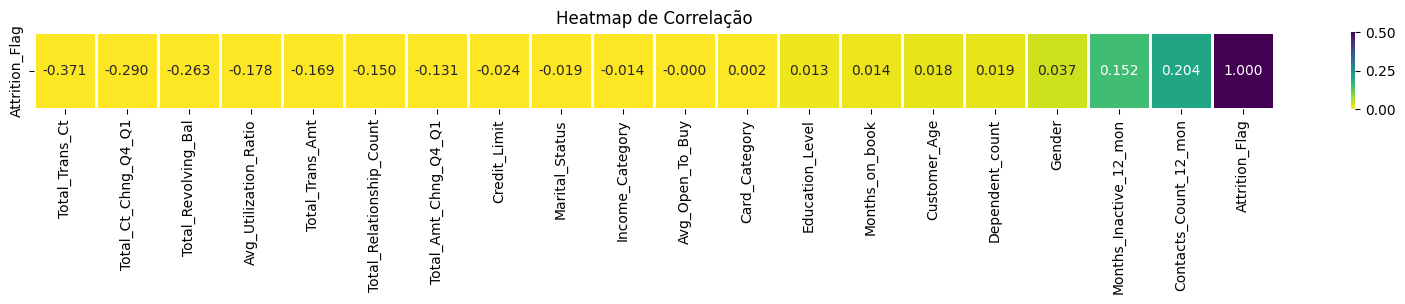

In [ ]:
#ordenado em ordem crescente
plt.figure(figsize=(20, 1))
sns.heatmap(Attrition_df, annot=True, cmap='viridis_r', fmt=".3f", vmin=0, vmax=0.5, linewidths=2, )
plt.title("Heatmap de Correlação")
plt.show()


Variáveis com valores absolutos devem ser analisadas com maior atenção pois existe uma maior chance de revelarem dados e padrões importantes.

No caso acima, não há correlações fortes, apenas fracas e moderadas, sendo apenas Total_Trans_Ct moderada. Aquelas que estão com correlação no intervalo de 0.1 e 0.3 são as fracas. O que indica que uma correlação direta entre attrition_flag e as outras variáveis não seja o ideal.

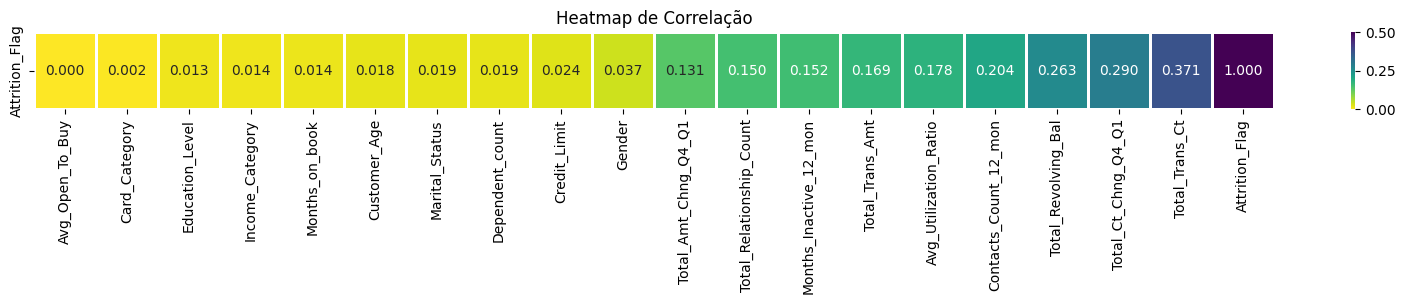

In [ ]:
#ordenado em valor absoluto
Attrition_df_ord = pd.DataFrame(corr_matrix['Attrition_Flag'].abs().sort_values(ascending=True)).transpose()

plt.figure(figsize=(20, 1))
sns.heatmap(Attrition_df_ord, annot=True, cmap='viridis_r', fmt=".3f", vmin=0, vmax=0.5, linewidths=2, )
plt.title("Heatmap de Correlação")
plt.show()


###Eliminando dados com baixo módulo da correlação

ρ ≤ 0.1

In [ ]:
corr_matrix_asc = corr_matrix['Attrition_Flag'].abs().sort_values(ascending=True)

In [ ]:
filtered_series = corr_matrix_asc[corr_matrix_asc <= 0.1].keys()
filtered_series

Index(['Avg_Open_To_Buy', 'Card_Category', 'Education_Level',
       'Income_Category', 'Months_on_book', 'Customer_Age', 'Marital_Status',
       'Dependent_count', 'Credit_Limit', 'Gender'],
      dtype='object')

In [ ]:
df_maior_corr = df.copy(deep=True).drop(columns= list(filtered_series))
print(list(df.columns),"\n",
    list(df_maior_corr.columns))

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] 
 ['Attrition_Flag', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


###Procurando Outliers

In [ ]:
from scipy.stats import zscore

# Calcule o Z-Score para cada coluna
z_scores = np.abs(zscore(df))

# Defina um limiar para identificar outliers (por exemplo, 3 desvios padrão)
limiar = 3

# Encontre índices dos outliers
indices_outliers = np.where(z_scores > limiar)

# Remova os outliers
seu_dataframe_sem_outliers = df[(z_scores < limiar).all(axis=1)]


###Colocando dados anteriormente qualitativos em gráficos de pizza

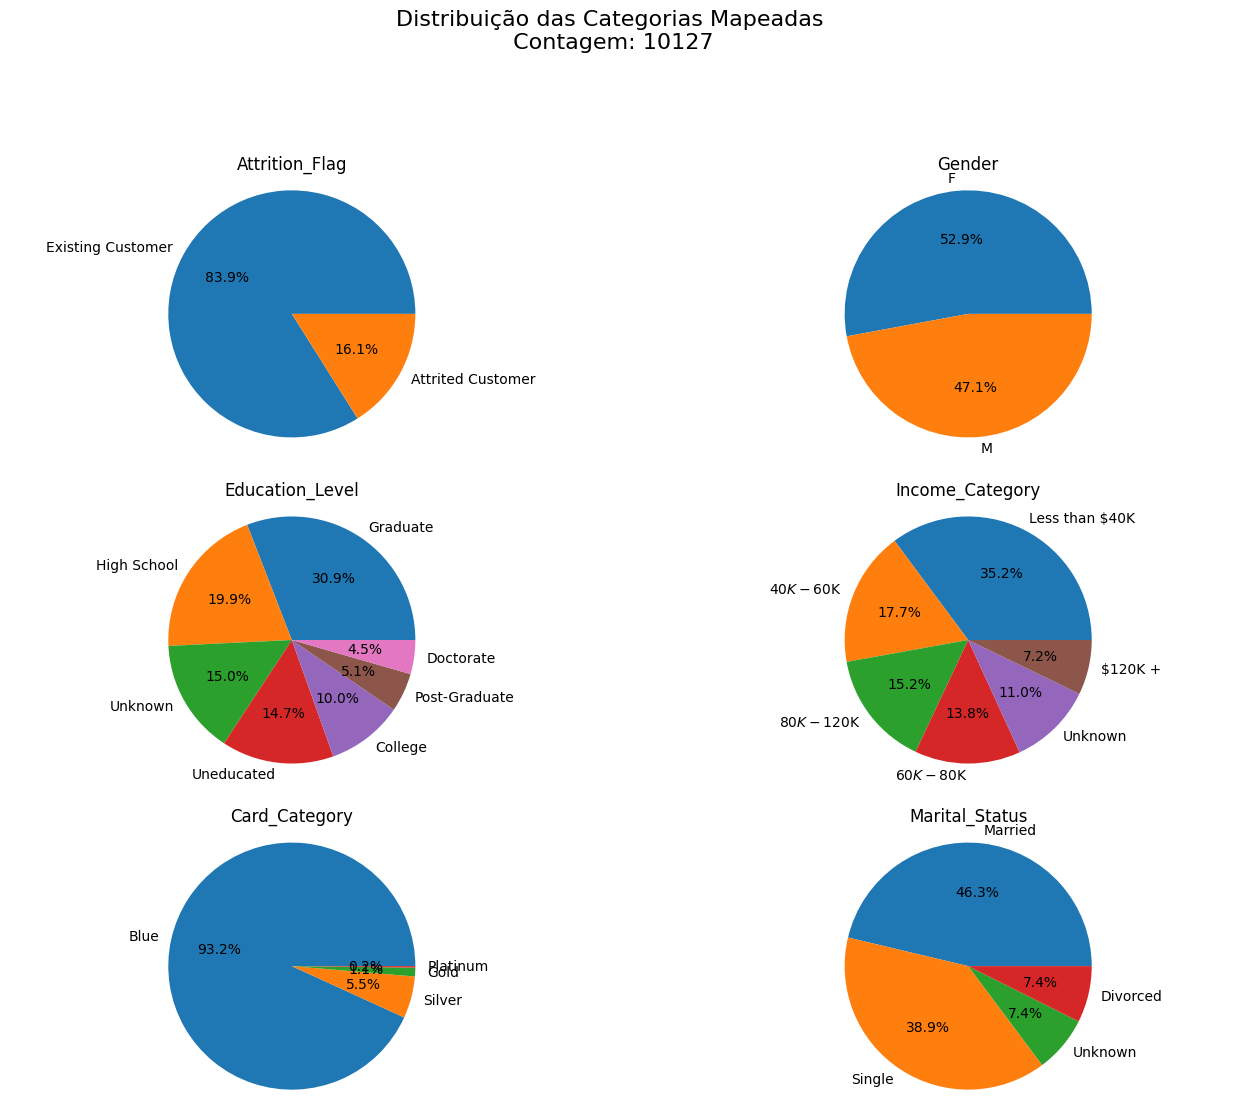

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
num_colunas = 2  # Número desejado de colunas
num_linhas = (len(categorias_mapeadas) + num_colunas - 1) // num_colunas  # Calcula o número de linhas necessário
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 4 * num_linhas))
plt.suptitle(f"Distribuição das Categorias Mapeadas\n Contagem: {contagem['total']}", y=1.02, fontsize=16)  # Adiciona o tít


for i, categoria in enumerate(categorias_mapeadas):
    linha_atual = i // num_colunas
    coluna_atual = i % num_colunas

    chaves = list(contagem[categoria])
    valores = list(contagem[categoria].values())

    plt.figure(dpi=100)


    wedges, texts, autotexts = axs[linha_atual, coluna_atual].pie(valores, labels=chaves, autopct='%1.1f%%', textprops={'size': 'medium'}, radius=0.7)

    axs[linha_atual, coluna_atual].set_title(categoria)
    axs[linha_atual, coluna_atual].axis('equal')  # Para garantir que o gráfico de pizza seja circular

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


###Histograma dos dados quantitativos

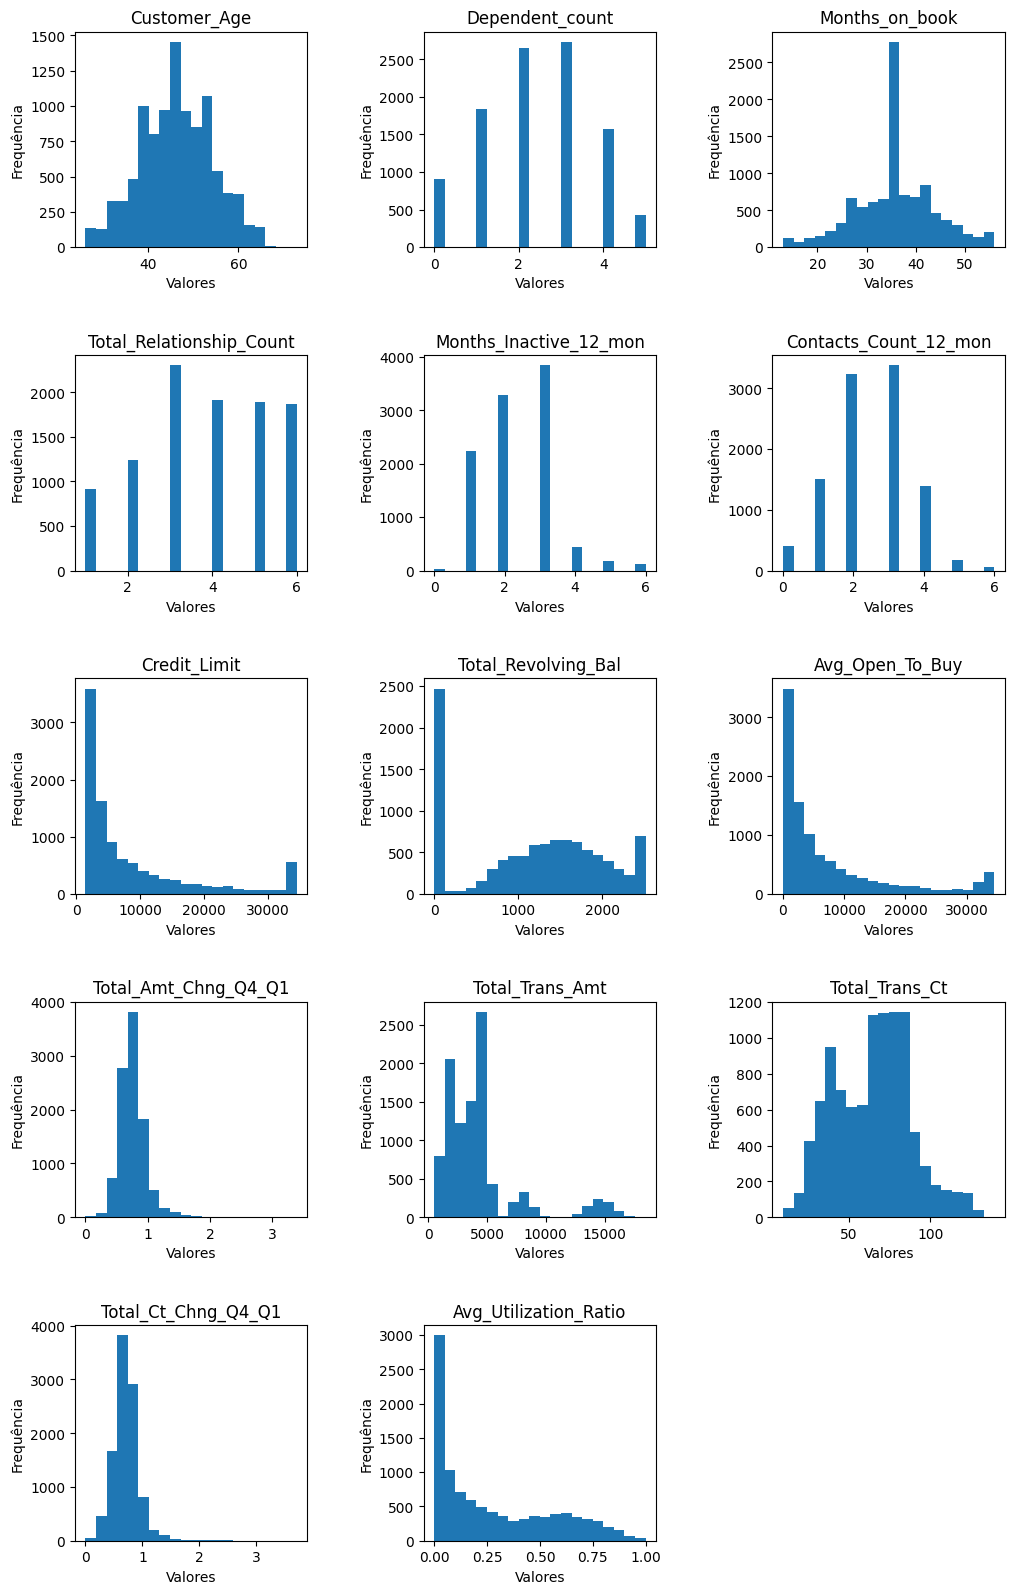

In [ ]:
dados_quantitativos = [coluna for coluna in df.columns if coluna not in categorias_mapeadas]

# Cria subplots para cada coluna quantitativa
num_subplots = len(dados_quantitativos)
num_linhas = (num_subplots + 1) // 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, 4 * num_linhas))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajusta o espaço entre os subplots

for i, coluna in enumerate(dados_quantitativos):
    linha_atual = i // num_colunas
    coluna_atual = i % num_colunas

    axs[linha_atual, coluna_atual].hist(df[coluna], bins=20)  # Ajuste o número de bins conforme necessário
    axs[linha_atual, coluna_atual].set_title(coluna)
    axs[linha_atual, coluna_atual].set_xlabel('Valores')
    axs[linha_atual, coluna_atual].set_ylabel('Frequência')

# Adiciona subplots adicionais se necessário
for j in range(num_subplots, num_linhas * num_colunas):
    fig.delaxes(axs.flatten()[j])

plt.show()


#Dividindo dados para treino e teste

In [ ]:
escolhido = 'Attrition_Flag'

x = df.drop([escolhido], axis=1)
x_alt = df_maior_corr.drop([escolhido], axis=1)

y = df[escolhido]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_alt, x_test_alt, y_train_alt, y_test_alt = train_test_split(x_alt, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(8101, 19)
(2026, 19)


Nesse caso, estou procurando analisar o risco de aumentar o crédito do cliente baseando-me em sua utilização de crédito média.

##Normalizando

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_columns_alt = df_maior_corr.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df_maior_corr[numeric_columns_alt] = scaler.fit_transform(df[numeric_columns_alt])

In [ ]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0.0,0.404255,0.0,0.6,0.222222,0.666667,0.6,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
818770008,0.0,0.489362,1.0,1.0,0.555556,0.333333,0.2,0.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
713982108,0.0,0.531915,0.0,0.6,0.555556,0.666667,0.8,0.0,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
769911858,0.0,0.297872,1.0,0.8,0.222222,0.000000,0.2,0.0,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
709106358,0.0,0.297872,0.0,0.6,0.111111,0.666667,0.6,0.0,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000


In [ ]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Attrition_Flag            float64
 1   Customer_Age              float64
 2   Gender                    float64
 3   Dependent_count           float64
 4   Education_Level           float64
 5   Marital_Status            float64
 6   Income_Category           float64
 7   Card_Category             float64
 8   Months_on_book            float64
 9   Total_Relationship_Count  float64
 10  Months_Inactive_12_mon    float64
 11  Contacts_Count_12_mon     float64
 12  Credit_Limit              float64
 13  Total_Revolving_Bal       float64
 14  Avg_Open_To_Buy           float64
 15  Total_Amt_Chng_Q4_Q1      float64
 16  Total_Trans_Amt           float64
 17  Total_Trans_Ct            float64
 18  Total_Ct_Chng_Q4_Q1       float64
 19  Avg_Utilization_Ratio     float64
dtypes: float64(20)
m

##Gerando modelos df completo

###Regressão logistíca


Base:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1699
           1       0.62      0.35      0.45       327

    accuracy                           0.86      2026
   macro avg       0.75      0.65      0.68      2026
weighted avg       0.84      0.86      0.84      2026

Acurácia: 0.8603158933859822


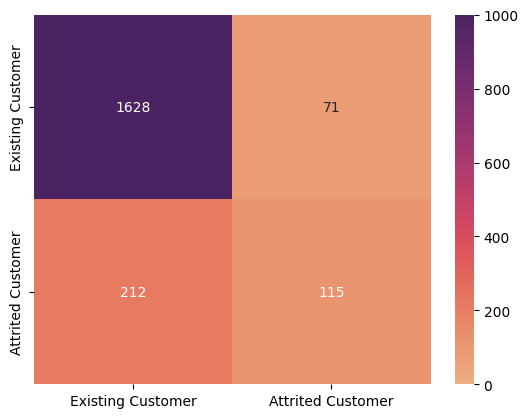

In [ ]:
# Criando e treinando o modelo de Regressão Logística
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_prediction = logreg.predict(x_test)

# Criando uma matriz de confusão
confusion_logreg = confusion_matrix(y_test, logreg_prediction)

# Imprimindo relatório de classificação
print("\nBase:")
print("\nRelatório de Classificação:")
print(classification_report(y_test, logreg_prediction))

# Imprimindo acurácia
print("Acurácia:", accuracy_score(y_test, logreg_prediction))

# Configurando a paleta de cores
cmap_logreg = sns.color_palette("flare", n_colors=len(x_test))
sns.heatmap(confusion_logreg, annot=True, vmin = 0, vmax = 1000, fmt='d', cmap=cmap_logreg, xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])

plt.show()


###Random Forest


Base:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1699
           1       0.94      0.81      0.87       327

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Acurácia: 0.9610069101678184 



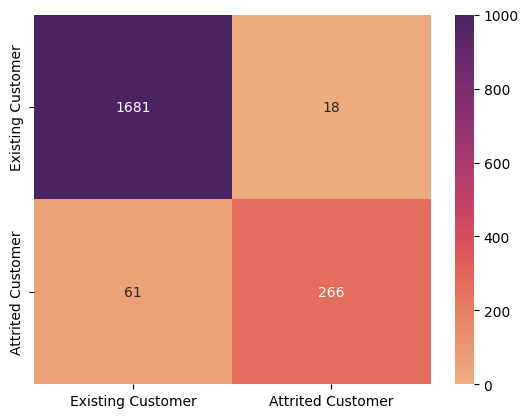

In [ ]:
# Inicialize o modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treine o modelo
RFC1 = model.fit(x_train, y_train)

# Faça previsões no conjunto de teste
rfc1_prediction = RFC1.predict(x_test)
rfc1_confusion = confusion_matrix(y_test_alt, rfc1_prediction)

# Imprimindo relatório de classificação
print("\nBase:")
print("\nRelatório de Classificação:")
print(classification_report(y_test, rfc1_prediction))

# Imprimindo acurácia
print("Acurácia:", accuracy_score(y_test, rfc1_prediction),"\n")

# Configurando a paleta de cores
cmap_logreg = sns.color_palette("flare", n_colors=len(x_test))
sns.heatmap(rfc1_confusion, annot=True, vmin = 0, vmax = 1000, fmt='d', cmap=cmap_logreg, xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])

plt.show()


###KNN



Base:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1699
           1       0.71      0.54      0.61       327

    accuracy                           0.89      2026
   macro avg       0.81      0.75      0.78      2026
weighted avg       0.88      0.89      0.88      2026

Acurácia: 0.8899308983218164 



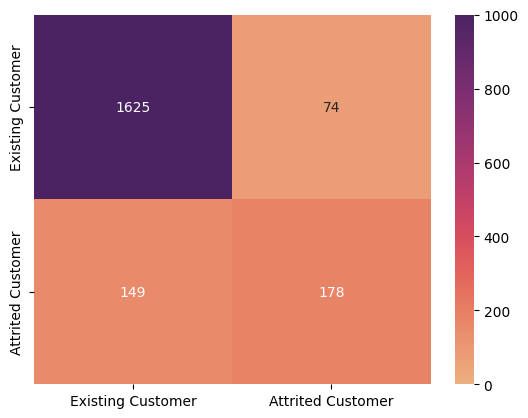

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_confusion = confusion_matrix(y_test_alt, knn_prediction)

# Imprimindo relatório de classificação
print("\nBase:")
print("\nRelatório de Classificação:")
print(classification_report(y_test, knn_prediction))

# Imprimindo acurácia
print("Acurácia:", accuracy_score(y_test, knn_prediction),"\n")

# Configurando a paleta de cores
cmap_logreg = sns.color_palette("flare", n_colors=len(x_test))
sns.heatmap(knn_confusion, annot=True, vmin = 0, vmax = 1000, fmt='d', cmap=cmap_logreg, xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])

plt.show()

##Gerando modelos df reduzido

###Regressão logística


Processada:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1699
           1       0.74      0.42      0.53       327

    accuracy                           0.88      2026
   macro avg       0.82      0.69      0.73      2026
weighted avg       0.87      0.88      0.87      2026

Acurácia: 0.8825271470878578 



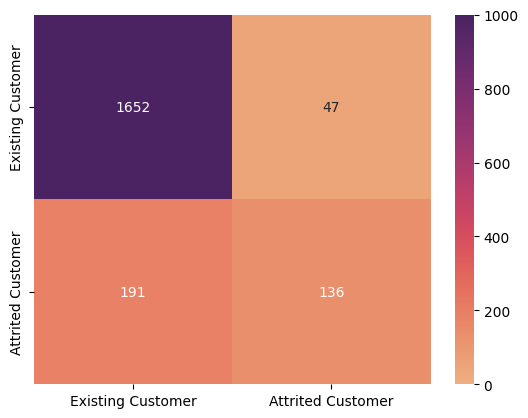

In [ ]:
# Criando e treinando o modelo de Regressão Logística
logreg = LogisticRegression()
logreg.fit(x_train_alt, y_train_alt)
logreg_prediction2 = logreg.predict(x_test_alt)

# Criando uma matriz de confusão
confusion_logreg2 = confusion_matrix(y_test_alt, logreg_prediction2)

# Imprimindo relatório de classificação
print("\nProcessada:")
print("\nRelatório de Classificação:")
print(classification_report(y_test_alt, logreg_prediction2))

# Imprimindo acurácia
print("Acurácia:", accuracy_score(y_test_alt, logreg_prediction2), "\n")

# Configurando a paleta de cores
cmap_logreg = sns.color_palette("flare", n_colors=len(x_test_alt))
sns.heatmap(confusion_logreg2, annot=True, vmin = 0, vmax = 1000, fmt='d', cmap=cmap_logreg, xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])

plt.show()


###Random Forest


Processada:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.92      0.84      0.88       327

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Acurácia: 0.9615004935834156 



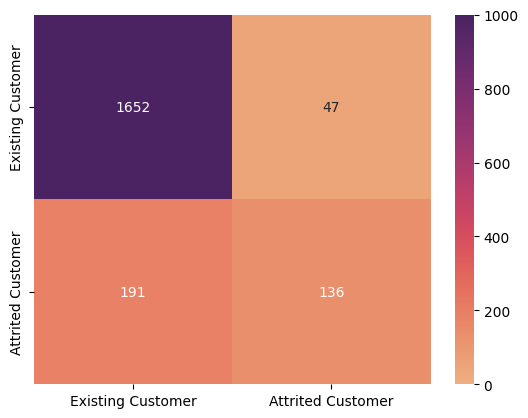

In [ ]:
# @title
# Inicialize o modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
RFC2 = model.fit(x_train_alt, y_train_alt)
rfc2_prediction = RFC2.predict(x_test_alt)
rfc2_confusion = confusion_matrix(y_test_alt, logreg_prediction)


# Imprimindo relatório de classificação
print("\nProcessada:")
print("\nRelatório de Classificação:")
print(classification_report(y_test_alt, rfc2_prediction))

# Imprimindo acurácia
print("Acurácia:", accuracy_score(y_test_alt, rfc2_prediction), "\n")

# Configurando a paleta de cores
cmap_logreg = sns.color_palette("flare", n_colors=len(x_test_alt))
sns.heatmap(rfc2_confusion, annot=True, vmin = 0, vmax = 1000, fmt='d', cmap=cmap_logreg, xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])

plt.show()

###KNN


Processada:

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1699
           1       0.74      0.61      0.67       327

    accuracy                           0.90      2026
   macro avg       0.83      0.79      0.81      2026
weighted avg       0.90      0.90      0.90      2026

Acurácia: 0.9022704837117473 



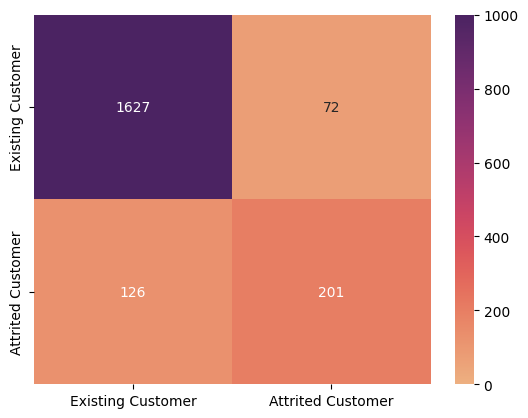

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_alt, y_train_alt)
knn_prediction2 = knn.predict(x_test_alt)
knn2_confusion = confusion_matrix(y_test_alt, knn_prediction2)


# Imprimindo relatório de classificação
print("\nProcessada:")
print("\nRelatório de Classificação:")
print(classification_report(y_test_alt, knn_prediction2))

# Imprimindo acurácia
print("Acurácia:", accuracy_score(y_test_alt, knn_prediction2), "\n")

# Configurando a paleta de cores
cmap_logreg = sns.color_palette("flare", n_colors=len(x_test_alt))
sns.heatmap(knn2_confusion, annot=True, vmin = 0, vmax = 1000, fmt='d', cmap=cmap_logreg, xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])

plt.show()

##Comparação

,F1 Score,Accuracy
logreg base,0.533333,0.882527
logreg processado,0.533333,0.882527
Random Forest base,0.870704,0.961007
Random Forest processada,0.875399,0.961500
KNN,0.614853,0.889931
KNN processado,0.670000,0.902270


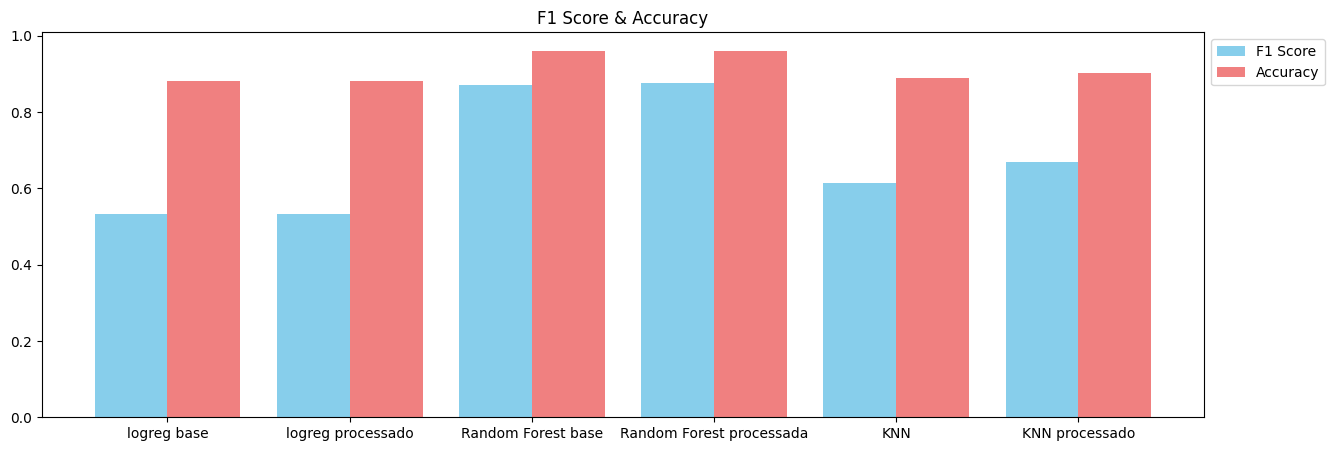

In [ ]:
f1_scores = []
acc = []
label = ["logreg base", "logreg processado", "Random Forest base", "Random Forest processada", "KNN", "KNN processado"]

# logreg_prediction
f1_scores.append(f1_score(y_test, logreg_prediction))
acc.append(accuracy_score(y_test, logreg_prediction))

# logreg_prediction2
f1_scores.append(f1_score(y_test, logreg_prediction2))
acc.append(accuracy_score(y_test, logreg_prediction2))

# rfc1_prediction
f1_scores.append(f1_score(y_test, rfc1_prediction))
acc.append(accuracy_score(y_test, rfc1_prediction))

# rfc2_prediction
f1_scores.append(f1_score(y_test, rfc2_prediction))
acc.append(accuracy_score(y_test, rfc2_prediction))

# knn_prediction
f1_scores.append(f1_score(y_test, knn_prediction))
acc.append(accuracy_score(y_test, knn_prediction))

# KNN 2
f1_scores.append(f1_score(y_test, knn_prediction2))
acc.append(accuracy_score(y_test, knn_prediction2))

# Tabela
table = {
    "F1 Score": f1_scores,
    "Accuracy": acc
}

table_df = pd.DataFrame(table, index=label)
display(table_df)

#Gráfico
plt.figure(figsize = (15, 5))

x_axis = np.arange(len(label))

plt.bar(x_axis - 0.2, f1_scores, 0.4, label="F1 Score")
plt.bar(x_axis + 0.2, acc, 0.4, label="Accuracy")

plt.legend(bbox_to_anchor = (1, 1))
plt.xticks(x_axis, label)
plt.title("F1 Score & Accuracy")

plt.show()

Em média os dados processados tem aproximações melhores.